# Modelagem

Nosso objetivo agora é criar um modelo de classificação que seja capaz de nos retornar com o máximo de precisão a qualidade de um bom vinho. Para isso testaremos alguns algorítmos e suas diferentes métricas para calcular este valor.

In [26]:
# importando biblitoecas
import os
import warnings
import numpy as np
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

In [3]:
# importando datasets

# data1 = data_no_out (dataset sem outliers)
data1 = pd.read_csv('..\\data\\processed\\data_no_out.csv')

# data2 = data_log (dataset com algumas colunas escalonadas pelo logarítmo)
data2 = pd.read_csv('..\\data\\processed\\data_log.csv')

In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4206 entries, 0 to 4205
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  4206 non-null   int64  
 1   fixed acidity         4206 non-null   float64
 2   volatile acidity      4206 non-null   float64
 3   citric acid           4206 non-null   float64
 4   residual sugar        4206 non-null   float64
 5   chlorides             4206 non-null   float64
 6   free sulfur dioxide   4206 non-null   float64
 7   total sulfur dioxide  4206 non-null   float64
 8   density               4206 non-null   float64
 9   pH                    4206 non-null   float64
 10  sulphates             4206 non-null   float64
 11  alcohol               4206 non-null   float64
 12  quality               4206 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 427.3 KB


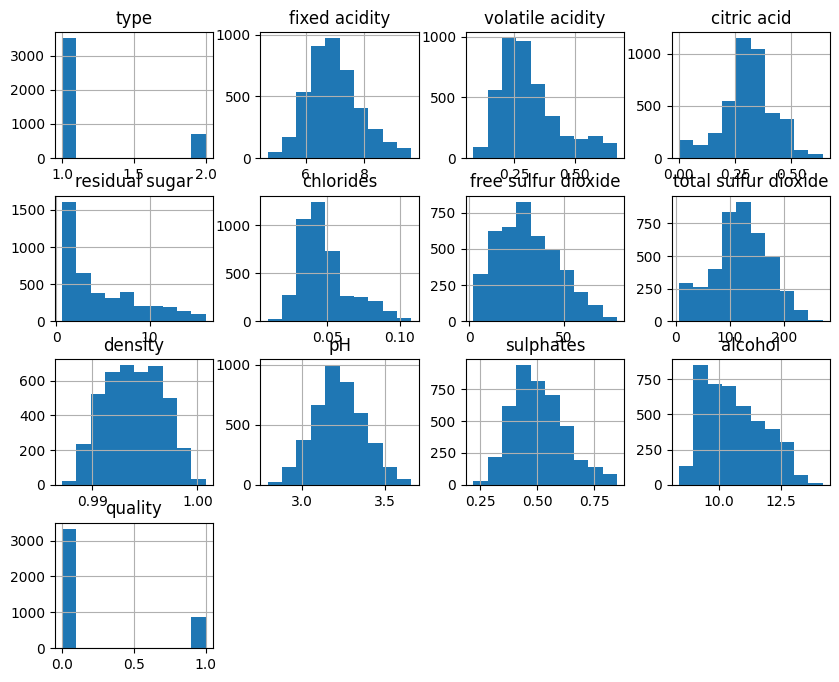

In [8]:
data1.hist(figsize=(10,8));

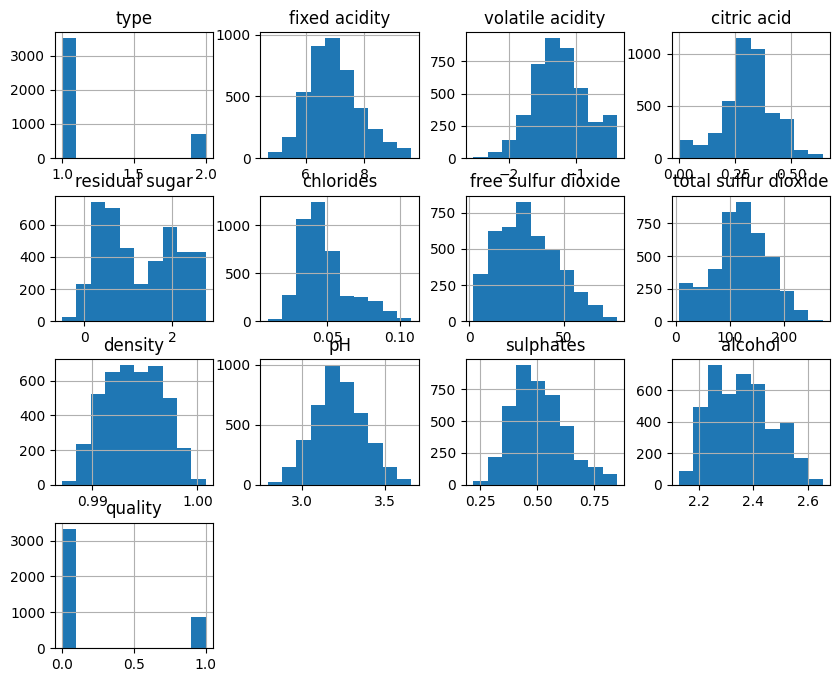

In [10]:
data2.hist(figsize=(10,8));

#### Proporção de dados da categoria alvo

In [20]:
data1['quality'].value_counts() / len(data1) * 100

quality
0    79.315264
1    20.684736
Name: count, dtype: float64

Percebe-se que a proporção de classes da categoria alvo é diferente, se utiliza-mos os dados desta forma com certeza impactará nosso modelo negativamente. 

Entretando temos duas saídas, ou passamos o argumento `stratify = True` ao criar o modelo, que fará com que o mesmo separe os dados de treino e teste na mesma proporção (79,3% classe 0 e 20,6 classe 1), ou utilizemos os métodos de Oversampling ou UnderSampling que iguala as classes, ambas as formas possuem vantagens e desvantagens:

**Stratify:**
- O modelo aprende usando as proporções reais do problema.
- Reflete melhor o comportamento do mundo real, especialmente quando as classes desbalanceadas são naturais.
- O modelo pode ser enviesado pela classe marjoritária.
- Métricas como acurácia podem ser enganosas
- Normalmente utilizado quando o objetivo é ter previsões que reflitam o cenário real.

**OverSmapling e Undersampling:**
- O OverSampling aumenta a classe minoritária, duplicando ouy sintetizando exemplos. 
- O UnderSampling diminui a classe marjoritária, removendo alguns exemplos.
- Ajuda o modelo a ficar menos tentêncioso, ajudando a classe minoritária ter mais evidencia.
- Pode melhorar técnicas como F1-Score, Recall e Precision da classe minoritária.
- O OS pode aumentar a chande de overfitting (quando o algorítmo aprende demais sobre um determinado dado), já que temos dados duplicados.
- O US perde informação, já que estamos excluindo dados para que as classes sejam balanceadas.
- O OS deve ser utilizado quando estamos buscando melhorar o desempenho do modelo para identificar classes minoritárias (Ex.: Detecção de fraudes, diagnóstico médico entre outros)
- O US é utilizado quando o desbalanceamento é extremo (Ex.: 99% vs 1%)

Desta forma concluímos que para nosso projeto e melhor forma para lidar com este desequilibrio de classes é utilizando o stratify.

#### Dividindo treino e teste

In [12]:
x = data1.drop(columns='quality', axis=1)

y = data1['quality'] # alvo

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.2, stratify=y)

# Dummmy Classifier (Modelo de Base)

O modelo mais simples de classificar os dados é simplesmente utilizar um algoritmo que chuta todas as classificações para a classe que tem maior frequência. Esse algoritmo serve como critério de comparação, para identificar se os outros modelos tem um desempenho melhor que a classificação mais simples possível. 

In [25]:
# definindo modelo
dummy = DummyClassifier()

# ajustando modelo aos dados
dummy.fit(x_train, y_train)

# avaliação
dummy.score(x_test, y_test)

0.7933491686460807

O modelo gerou uma taxa de acerto de 79%. Isso nos informa que os modelos mais robustos a seguir precisam ter uma taxa de acerto maior.

____

# Árvore de Decisão

In [29]:
# definindo modelo
model_dt = DecisionTreeClassifier(random_state=1, )

# ajustando modelo aos dados
model_dt.fit(x_train, y_train)

# prevendo valor
model_dt.predict(x_test)

model_dt.score(x_test, y_test)

0.7458432304038005